<a href="https://colab.research.google.com/github/Gilbert228/Logistic_Regression/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

SEction I: Data Loading

In [4]:
bank=pd.read_csv('/content/drive/MyDrive/Dataset/portu_banking_final.csv')
bank.head(10)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,8,999.0,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,...,1,999.0,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,...,1,999.0,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1,3.0,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,...,2,9999.0,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


In [5]:
bank.shape

(41188, 21)

In [6]:
bank.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

Y is target variable 

In [8]:
bank['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [9]:
bank['y'].value_counts() /len(bank) * 100


0    88.734583
1    11.265417
Name: y, dtype: float64

There is no third class aprt for 0 and 1 so the target variable 'y'  is balanced.

Section II: data Cleaning

In [10]:
bank.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [11]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [12]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

No null value in the data

In [13]:
bank['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
unknown                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

In [14]:
bank['job'].value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
RETIRED              3
SERVICES             3
STUDENT              2
ADMIN.               2
MANAGEMENT           1
TECHNICIAN           1
BLUE-COLLAR          1
HOUSEMAID            1
UNKNOWN              1
Name: job, dtype: int64

In [15]:
bank['marital'].value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [16]:
bank['age'].value_counts()

31       1530
32       1456
33       1452
35       1431
36       1408
         ... 
94          1
17          1
87          1
95          1
20-40       1
Name: age, Length: 159, dtype: int64

In [17]:
bank['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [18]:
bank['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [19]:
bank['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [20]:
bank['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [21]:
bank['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [22]:
bank['duration'].value_counts()

90      170
85      170
136     168
73      167
124     164
       ... 
1788      1
3422      1
1488      1
1306      1
1490      1
Name: duration, Length: 1544, dtype: int64

In [23]:
bank['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
25        8
26        8
31        7
30        7
35        5
33        4
32        4
34        3
42        2
43        2
40        2
39        1
41        1
56        1
37        1
Name: campaign, dtype: int64

In [24]:
bank['pdays'].value_counts()

999.0     39668
3.0         439
6.0         412
4.0         118
9.0          64
2.0          61
7.0          60
12.0         58
10.0         52
5.0          46
13.0         36
11.0         28
1.0          26
15.0         24
14.0         20
8.0          18
0.0          15
16.0         11
17.0          8
18.0          7
9999.0        5
19.0          3
22.0          3
21.0          2
26.0          1
20.0          1
25.0          1
27.0          1
Name: pdays, dtype: int64

In [25]:
bank['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [26]:
bank['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [27]:
bank['emp_var_rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp_var_rate, dtype: int64

In [28]:
bank['cons_price_idx'].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons_price_idx, dtype: int64

In [29]:
bank['cons_conf_idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons_conf_idx, dtype: int64

In [30]:
bank[ 'euribor3m'].value_counts()

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
3.743       1
3.901       1
3.853       1
0.969       1
3.282       1
Name: euribor3m, Length: 316, dtype: int64

In [31]:
bank[ 'nr_employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr_employed, dtype: int64

In [32]:
bank[ 'y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

 Part IV : Using Data Cleaning principles you learned from Pandas Tutorial figure out the best ways to get rid of the dirty data Part V : Print the cleaned data

In [33]:
bank['education'].replace(["basic-4y",'unversity.degree','basic-9y','basic-6y'],["basic.4y",'university.degree','basic.9y','basic.6y'],inplace=True)

In [34]:
bank['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [35]:
bank['job'].value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
RETIRED              3
SERVICES             3
STUDENT              2
ADMIN.               2
MANAGEMENT           1
TECHNICIAN           1
BLUE-COLLAR          1
HOUSEMAID            1
UNKNOWN              1
Name: job, dtype: int64

In [36]:
bank['job'].replace(["unknown",'ADMIN.','RETIRED','SERVICES','STUDENT','MANAGEMENT','TECHNICIAN','BLUE-COLLAR','HOUSEMAID','UNKNOWN'],["admin.",'admin.','retired','services','student','management','technician','blue-collar','housemaid','admin.'],inplace=True)

In [37]:
bank['age'].replace(['35-30'],['32'],inplace=True)
bank['age'].replace(['25-30'],['27'],inplace=True)
bank['age'].replace(['45-50'],['47'],inplace=True)
bank['age'].replace(['20-40'],['30'],inplace=True)
bank['age'].replace(['30-40'],['35'],inplace=True)
bank['age'].replace(['35-40'],['37'],inplace=True)
bank['age'].replace(['20-25'],['22'],inplace=True)
bank['age'].replace(['30-32'],['31'],inplace=True)
bank['age'].replace(['30-35'],['32'],inplace=True)
bank['age'].replace(['50-55'],['52'],inplace=True)
bank['age'].replace(['18-25'],['22'],inplace=True)
bank['age'] = bank['age'].astype(int) #convert as integer

In [38]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [39]:
bank['marital'].replace(["M",'S','D','unknown'],["married",'single','divorced','single'],inplace=True)

In [40]:
bank['marital'].value_counts()

married     24928
single      11648
divorced     4612
Name: marital, dtype: int64

In [41]:
bank['poutcome'].replace(['nonexistent'],['failure'],inplace=True)

In [42]:
bank['poutcome'].value_counts()

failure    39815
success     1373
Name: poutcome, dtype: int64

In [43]:
bank['loan'].replace(['unknown'],['no'],inplace=True)

In [44]:
bank['loan'].value_counts()

no     34940
yes     6248
Name: loan, dtype: int64

In [45]:
bank['default'].replace(['unknown'],['no'],inplace=True)

In [46]:
bank['default'].value_counts()

no     41185
yes        3
Name: default, dtype: int64

In [47]:
bank['housing'].replace(['unknown'],['yes'],inplace=True)


In [48]:
bank['housing'].value_counts()

yes    22566
no     18622
Name: housing, dtype: int64

Section III : Exploring data with Group by

In [49]:
bank.groupby(['y']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.910583,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [50]:
bank.groupby(['job']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.413225,253.862909,2.624256,955.514788,0.187965,0.026070,93.539728,-40.201004,3.562512,5164.395638,0.129185
blue-collar,39.555111,264.542360,2.558461,987.105468,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,987.448489,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.360123,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.947220,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [51]:
bank.groupby(['marital']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.898959,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.306723,257.438623,2.57281,967.969753,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.206817,261.876030,2.53829,952.139595,0.211796,-0.168355,93.516984,-40.918020,3.317417,5155.214337,0.140110


In [52]:
bank.groupby(['education']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,970.015326,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,40.447208,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,39.061869,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998108,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.079725,252.533855,2.586115,962.482548,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.877630,253.223373,2.563527,953.286982,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


Section III : Exploratory Data Analysis

In [53]:
pd.crosstab(bank.y, bank.job)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
y,,,,,,,,,,,
0,9363,8616,1332,954,2596,1286,1272,3646,600,6013,870
1,1389,638,124,106,328,434,149,323,275,730,144


In [54]:
Z=pd.crosstab(bank.y,bank.job)

<Figure size 2160x2160 with 0 Axes>

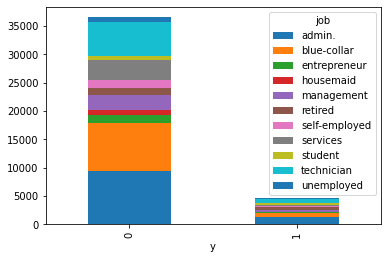

<Figure size 2160x2160 with 0 Axes>

In [55]:
Z.plot(kind='bar',stacked=True)
plt.figure(figsize=(30,30))

In [56]:
pd.crosstab(bank.y, bank.marital)

marital,divorced,married,single
y,,,
0,4136,22396,10016
1,476,2532,1632


In [57]:
mr=pd.crosstab(bank.y, bank.marital)

<Figure size 2160x2160 with 0 Axes>

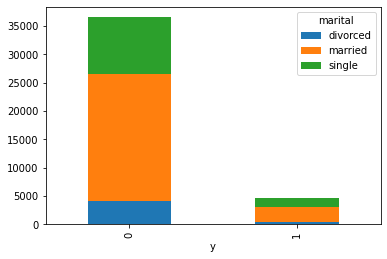

<Figure size 2160x2160 with 0 Axes>

In [58]:
mr.plot(kind='bar',stacked=True)
plt.figure(figsize=(30,30))

In [59]:
pd.crosstab(bank.y, bank.education)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,,,
0,3748,2104,5572,8484,14,4648,10498,1480
1,428,188,473,1031,4,595,1670,251


In [60]:
ed=pd.crosstab(bank.y, bank.education)


<Figure size 2160x2160 with 0 Axes>

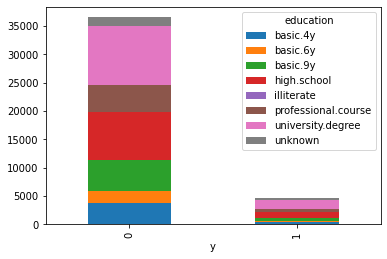

<Figure size 2160x2160 with 0 Axes>

In [61]:
ed.plot(kind='bar',stacked=True)
plt.figure(figsize=(30,30))

In [62]:
pd.crosstab(bank.y, bank.y)

y,0,1
y,,
0,36548,0
1,0,4640


In [63]:
ul=pd.crosstab(bank.y, bank.y)

<Figure size 2160x2160 with 0 Axes>

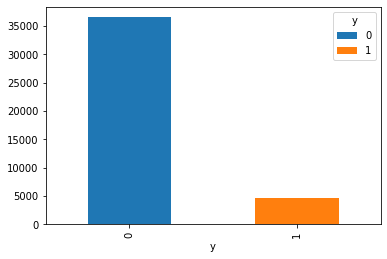

<Figure size 2160x2160 with 0 Axes>

In [64]:
ul.plot(kind='bar',stacked=True)
plt.figure(figsize=(30,30))

Explore the age column using a histogram and note down your observations

In [65]:
pd.crosstab(bank.y, bank.age)

age,17,18,19,20,21,22,23,24,25,26,...,85,86,87,88,89,91,92,94,95,98
y,,,,,,,,,,,,,,,,,,,,,
0,3,16,22,42,73,103,178,376,504,576,...,8,3,0,13,0,2,1,1,1,0
1,2,12,20,23,29,36,48,86,93,122,...,7,5,1,9,2,0,3,0,0,2


In [66]:
ag=pd.crosstab(bank.y, bank.age)

<Figure size 2160x2160 with 0 Axes>

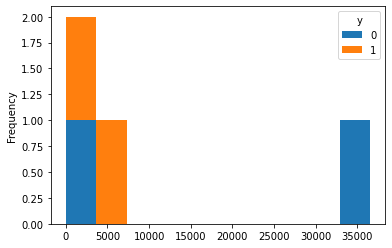

<Figure size 2160x2160 with 0 Axes>

In [67]:
ul.plot(kind='hist',stacked=True)
plt.figure(figsize=(30,30))

Section IV : Categorical Variable Encoding

In [68]:
### categorical
categorical_col = list(bank.select_dtypes(include=['object']))
categorical_col
     

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [69]:
vr=pd.get_dummies(bank[categorical_col])

In [70]:
vr

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_success
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
41184,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
41185,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
41186,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0


In [71]:
vr.describe()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_success
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.261047,0.224677,0.035350,0.025736,0.070992,0.041760,0.034500,0.096363,0.021244,0.163713,...,0.099568,0.017432,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.966665,0.033335
std,0.439211,0.417375,0.184665,0.158348,0.256814,0.200042,0.182513,0.295092,0.144199,0.370019,...,0.299427,0.130877,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.179512,0.179512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
vr.shape

(41188, 47)

In [73]:
bank['age'].unique()

array([44, 53, 28, 39, 55, 30, 37, 36, 27, 34, 41, 33, 26, 52, 35, 40, 32,
       49, 38, 47, 46, 29, 54, 42, 72, 48, 43, 56, 31, 24, 68, 59, 50, 45,
       25, 57, 63, 58, 60, 64, 51, 23, 20, 74, 80, 61, 62, 75, 21, 82, 77,
       22, 70, 76, 73, 66, 71, 19, 79, 88, 65, 67, 81, 18, 84, 69, 98, 85,
       83, 78, 92, 86, 94, 17, 91, 89, 87, 95])

 part II : Explore your new dataset with these new dummy variables !

In [74]:
dub=bank.drop(columns=categorical_col)

In [75]:
dub

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999.0,0,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,196,2,999.0,0,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,62,3,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,200,2,999.0,0,-3.4,92.431,-26.9,0.742,5017.5,0


In [76]:
data=pd.concat([dub,vr],axis=1)

In [77]:
data

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,...,1,0,0,1,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,1,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999.0,0,1.4,94.465,-41.8,4.866,5228.1,...,0,0,0,0,0,1,0,0,1,0
41184,31,196,2,999.0,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,0,1,0,0,1,0
41185,42,62,3,999.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,0,1,1,0
41186,48,200,2,999.0,0,-3.4,92.431,-26.9,0.742,5017.5,...,0,1,0,0,0,0,1,0,1,0


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  float64
 4   previous                       41188 non-null  int64  
 5   emp_var_rate                   41188 non-null  float64
 6   cons_price_idx                 41188 non-null  float64
 7   cons_conf_idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr_employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

Section V : Preliminary Training

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

 Part II : Split your train and test dataset and train on the data 

In [80]:
x=data.drop(columns=['y'])

In [81]:
x

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,...,1,0,0,1,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,1,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999.0,0,1.4,94.465,-41.8,4.866,5228.1,...,0,0,0,0,0,1,0,0,1,0
41184,31,196,2,999.0,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,0,1,0,0,1,0
41185,42,62,3,999.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,0,1,1,0
41186,48,200,2,999.0,0,-3.4,92.431,-26.9,0.742,5017.5,...,0,1,0,0,0,0,1,0,1,0


In [82]:
y=data.y

In [83]:
y

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

In [84]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [85]:
x_train.shape

(32950, 57)

In [86]:
x_test.shape

(8238, 57)

In [87]:
y_train.shape

(32950,)

In [88]:
y_test.shape

(8238,)

In [89]:
#train the model
m=LogisticRegression(verbose=1)
m.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


LogisticRegression(verbose=1)

In [90]:
#testingthemodel
pred=m.predict(x_test)
print(pred)
print()
print(classification_report(y_test,pred))

[0 0 0 ... 0 0 0]

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7291
           1       0.66      0.39      0.49       947

    accuracy                           0.91      8238
   macro avg       0.79      0.68      0.72      8238
weighted avg       0.89      0.91      0.90      8238



We are 93% sure that the customer will subscribe after the marketing campaign and 66 % sure that they will not subscribe after the campaign.
 So 97% of the time, the precision for 0 will be true and 40% of the time thw precision for 1 will be true.

Section VI : Let's Improve the performance !
SMOTE is a technique to balance the dataset

In [91]:
from imblearn.over_sampling import SMOTE

In [92]:
sm=SMOTE()
x_sm,y_sm=sm.fit_resample(x,y)

In [93]:
y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [94]:
X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm,test_size=0.2,random_state=0)
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      7290
           1       0.93      0.92      0.92      7330

    accuracy                           0.92     14620
   macro avg       0.92      0.92      0.92     14620
weighted avg       0.92      0.92      0.92     14620



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We are 92% sure that the customer will subscribe after the marketing campaign and  93% sure that they will not subscribe after the campaign. So 93% of the time, the precision for 0 will be true and 92% of the time thw precision for 1 will be true.

1 and 0 ratio is 4640:36548  (12.6%, 87.4%)

 Part III : Make note of the y label data now , what are the rations now ?
    Before SMOTE 'Y' is not balanced 

In [95]:
y_sm.value_counts()

0    36548
1    36548
Name: y, dtype: int64

After SMOTE the 'Y" is balanced


Section VII : Let us Re-Train!

In [96]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
#regressor = RandomForestRegressor(n_estimators=100, max_depth=10)

In [102]:
n_features_to_select=30
rfe = RFE(log, n_features_to_select=n_features_to_select)
rfe= rfe.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [103]:
rfe.ranking_

array([23, 21, 18, 24, 16, 17, 14, 19, 11, 20,  7,  1,  2,  3,  6, 27,  5,
        1,  9,  4,  8,  1,  1,  1,  1,  1,  1,  1, 25,  1,  1,  1, 22, 28,
        1,  1,  1,  1,  1,  1,  1,  1, 12,  1,  1, 15,  1,  1, 26, 10,  1,
        1,  1,  1,  1,  1, 13])

In [104]:
predictions = rfe.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7290
           1       0.99      0.90      0.94      7330

    accuracy                           0.94     14620
   macro avg       0.95      0.94      0.94     14620
weighted avg       0.95      0.94      0.94     14620



We are 90% sure that the customer will subscribe after the marketing campaign and 99% sure that they will not subscribe after the campaign. So 99% of the time, the precision for 0 will be true and 90% of the time thw precision for 1 will be true.